In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
df1=pd.read_csv('C:/Users/Rory/Downloads/price_paid_records.csv',index_col = 'Transaction unique identifier')
df1['Date of Transfer'] = pd.to_datetime(df1['Date of Transfer'])
df2=pd.read_csv('C:/Users/Rory/Downloads/ppd_data.csv',index_col = 'unique_id')
df2['deed_date']=pd.to_datetime(df2['deed_date'])
df2=df2.rename(columns={"price_paid":"Price", "deed_date":"Date","property_type":"Type"})
df1=df1.rename(columns={"Date of Transfer":"Date","Property Type":"Type"})

In [3]:
df2.head()

,Price,Date,postcode,Type,new_build,estate_type,saon,paon,street,locality,...,F,Unnamed: 22,5,MILL LANE,Unnamed: 25,CARDIFF,CARDIFF.1,CARDIFF.2,B,http://landregistry.data.gov.uk/data/ppi/transaction/68FEB20C-6B59-38DA-E053-6C04A8C051AE/current
unique_id,,,,,,,,,,,,,,,,,,,,,
68FEB20C-6B6B-38DA-E053-6C04A8C051AE,3703345,2017-12-19,CF1 1FL,O,N,F,NaN,6,MILL LANE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404A5AF4-73EF-CD2B-E050-A8C063055C7B,450000,2016-09-16,CF1 3BY,O,N,F,NaN,19,WINDSOR PLACE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50F18103-F400-9FD5-E050-A8C063054923,560000,2017-05-09,CF1 7NJ,O,N,F,NaN,162,PENARTH ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7011B10A-450D-8ED6-E053-6B04A8C075C1,360000,2018-05-30,CF1 7TT,O,N,F,NaN,UNIT 4,PENARTH ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582D0636-B563-8F22-E053-6C04A8C01BAC,57500,2017-07-28,CF1 8LT,F,N,L,NaN,64,LOWER CATHEDRAL ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Removing all house sales not in Cardiff
notcardiff=df1[df1['County']!='CARDIFF'].index
df1.drop(notcardiff, inplace=True)
(df1['County']== 'CARDIFF').value_counts()

True    134115
Name: County, dtype: int64

In [5]:
notterrace1=df1[df1['Type']!='T'].index
df1.drop(notterrace1, inplace=True)
notterrace2=df2[df2['Type']!='T'].index
df2.drop(notterrace2, inplace=True)

In [6]:
df1=df1[['Price','Date']]
df1['Date2']=df1['Date']
df1.index.name='index_no'
df2=df2[['Price','Date']]
df2['Date2']=df2['Date']
df2.index.name='index_no'

In [7]:
df=pd.concat([df1,df2])
df.index.drop_duplicates(keep=False)

Index(['{742E87B7-5134-487D-8370-1E456AACB593}',
       '{D32149A0-38C6-4941-B288-423F13479616}',
       '{24DF25B8-94E7-41A3-9356-554B70405C36}',
       '{CB8C758E-8EE7-4B8B-88CA-58C34A33B833}',
       '{0DB1DE63-226D-4A0B-867A-58C5E8336201}',
       '{84FB5E9C-FB74-4E3B-9C65-4E1C9CD714AC}',
       '{DA7FDF0F-B10E-47F8-8845-1AC28A2EF0B9}',
       '{0F86AD6A-62B8-45C2-ACA5-4E21B52A7EAA}',
       '{0CA93971-A3D7-48FC-9D48-1AC7292070D6}',
       '{DCAB95E3-F0E5-4793-A7F4-58CEE8F65028}',
       ...
       '79A74E21-4D55-1289-E053-6B04A8C01627',
       '64342BFD-ED2C-422C-E053-6C04A8C0FB8A',
       '64342BFD-EC7A-422C-E053-6C04A8C0FB8A',
       'AC07BBCF-EFF2-0445-E053-6C04A8C01E31',
       '7E86B6FA-9D31-458C-E053-6B04A8C0C84C',
       'AC07BBCF-EFB6-0445-E053-6C04A8C01E31',
       '5F54B81C-DD1C-2B45-E053-6B04A8C01FB0',
       '23B6165E-0311-FCF4-E050-A8C0620577FA',
       '9B7197B4-6DF8-4B75-8CEF-5FCB1D0C4FFF',
       'CF441611-97E1-48B7-AC6A-091DC7798A28'],
      dtype='object', name='

In [8]:
df.head()

,Price,Date,Date2
index_no,,,
{742E87B7-5134-487D-8370-1E456AACB593},35450,1995-07-14,1995-07-14
{D32149A0-38C6-4941-B288-423F13479616},43500,1995-12-07,1995-12-07
{24DF25B8-94E7-41A3-9356-554B70405C36},21000,1995-10-26,1995-10-26
{CB8C758E-8EE7-4B8B-88CA-58C34A33B833},28700,1995-10-20,1995-10-20
{0DB1DE63-226D-4A0B-867A-58C5E8336201},31000,1995-11-30,1995-11-30


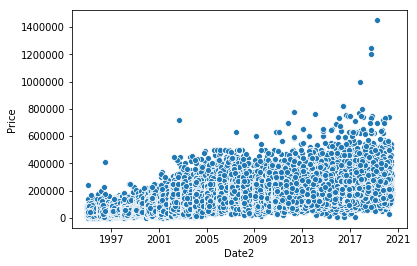

In [9]:
ax=sns.scatterplot(x="Date2", y="Price", data=df)

In [10]:
#df['Date of Transfer'].hist(bins=22)

In [11]:
#Outlier removal - lets get rid of those million pound houses.....
df['Year']=df['Date'].dt.year
outliers=[]
threshold=3
yr_median=pd.DataFrame(df.groupby(['Year'], as_index=False)['Price'].median().set_index('Year'))
yr_std=pd.DataFrame(df.groupby(['Year'], as_index=False).agg({'Price':['std']}).set_index('Year'))

for d in df['Year'].unique():                
    for label, row in df.iterrows():
        if row['Year']==d:
            z_score= np.divide(np.subtract(row['Price'], (yr_median.values[yr_median.index==d])),(yr_std.values[yr_std.index==d]))
            if np.abs(z_score) > threshold:
                outliers.append(label)
        
#Removing outliers

for i in outliers:
    df.drop(i , inplace=True)




In [12]:
dfbackup=df


In [13]:
dfbackup

,Price,Date,Date2,Year
index_no,,,,
{742E87B7-5134-487D-8370-1E456AACB593},35450,1995-07-14,1995-07-14,1995
{D32149A0-38C6-4941-B288-423F13479616},43500,1995-12-07,1995-12-07,1995
{24DF25B8-94E7-41A3-9356-554B70405C36},21000,1995-10-26,1995-10-26,1995
{CB8C758E-8EE7-4B8B-88CA-58C34A33B833},28700,1995-10-20,1995-10-20,1995
{0DB1DE63-226D-4A0B-867A-58C5E8336201},31000,1995-11-30,1995-11-30,1995
...,...,...,...,...
AC07BBCF-EFB6-0445-E053-6C04A8C01E31,170000,2017-11-09,2017-11-09,2017
5F54B81C-DD1C-2B45-E053-6B04A8C01FB0,175000,2017-08-04,2017-08-04,2017
23B6165E-0311-FCF4-E050-A8C0620577FA,190000,2015-10-02,2015-10-02,2015


In [14]:
df=df[['Price','Date']].reset_index()
df=df.set_index('Date')
df=df[['Price']]

In [15]:
#Time series
ts=df.resample('m').mean()
ts=ts['Price']

In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(40,20))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

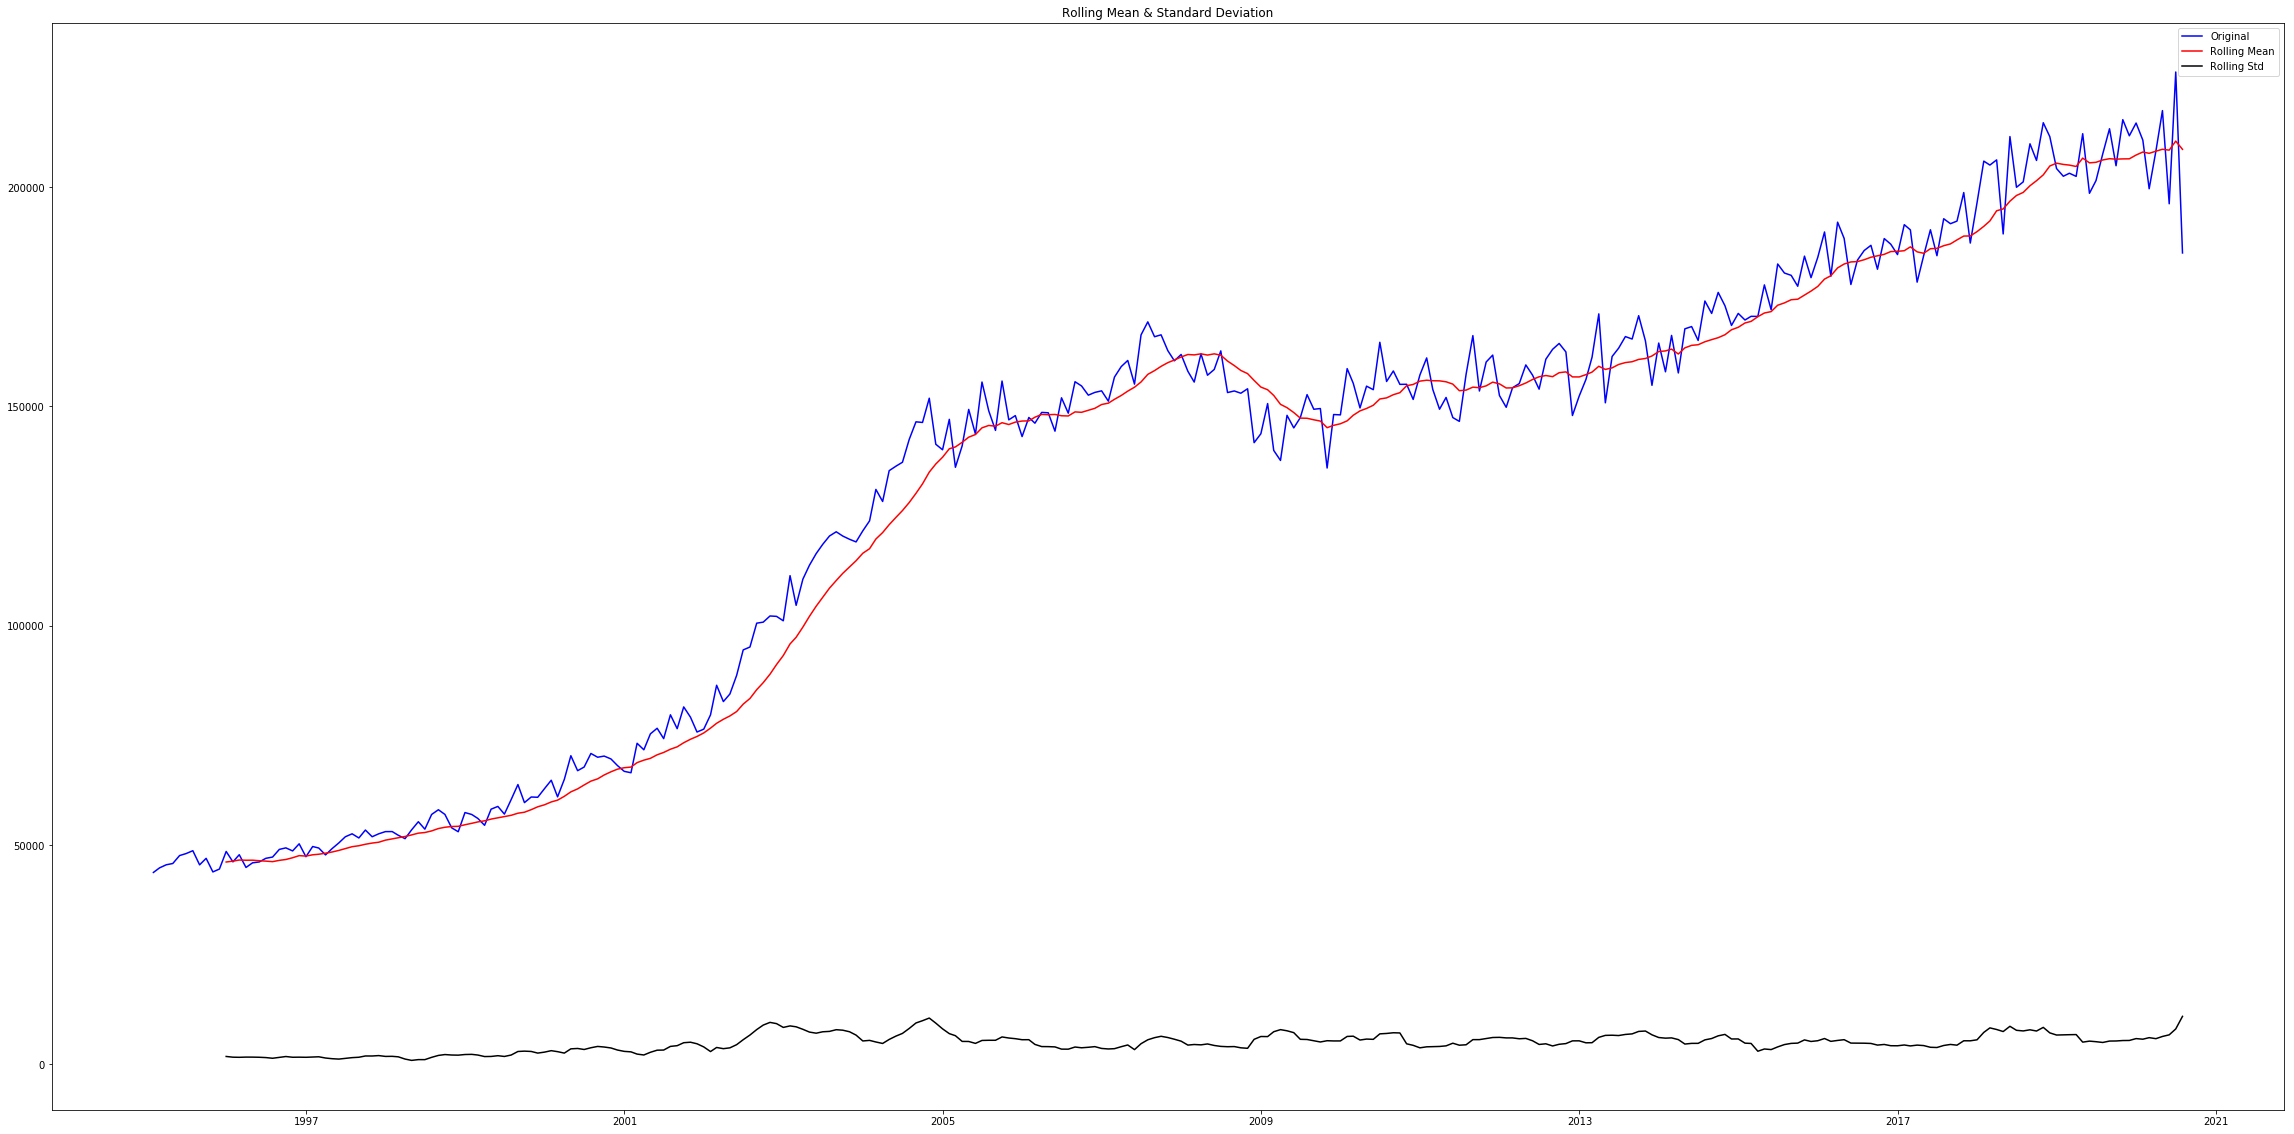

Results of Dickey-Fuller Test:
Test Statistic                  -1.051309
p-value                          0.734094
#Lags Used                       4.000000
Number of Observations Used    302.000000
Critical Value (1%)             -3.452190
Critical Value (5%)             -2.871158
Critical Value (10%)            -2.571895
dtype: float64


In [17]:

test_stationarity(ts)

Time series is not stationary:
- the mean is increasing over time even though the standard deviation is small
- The test statistic is greater thann all critical values, hence we cannot reject the null hypothesis of the data is not stationary at the 99%,95% or 90% level of significance


After transformation and moving average smoothing, we still cannot reject the null hypothesis, even at 90% significance. More is needed to make the time-series stationary.

Seasonality: using decomposistion 

C:\Users\Rory\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


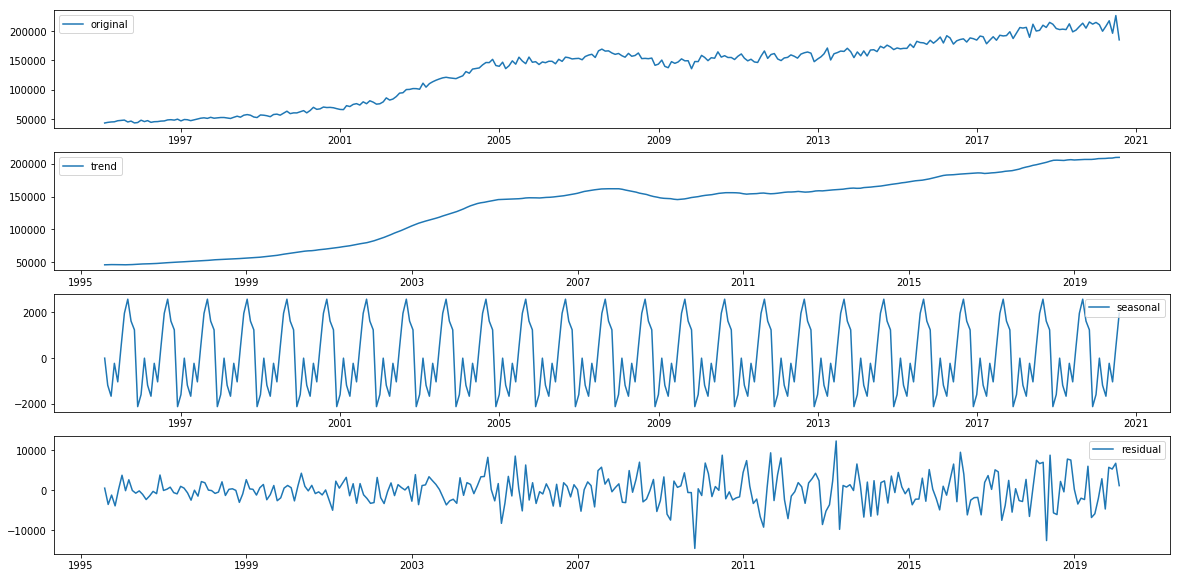

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(ts,freq=12)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')


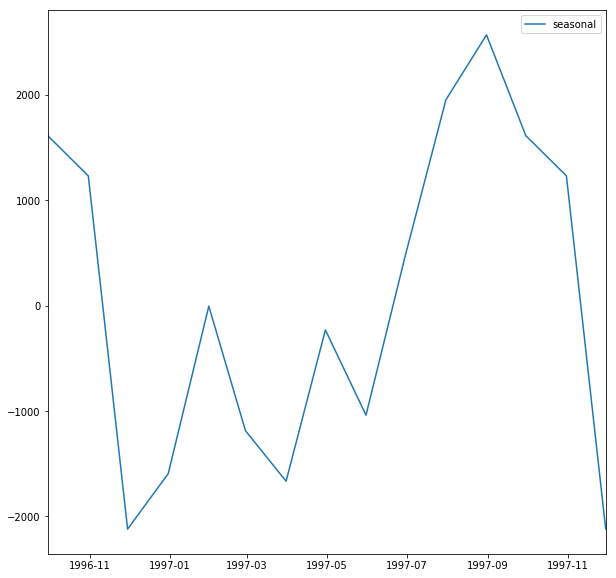

In [22]:
import datetime
import matplotlib.dates as dates
plt.figure(figsize=(10,10))
plt.plot(seasonal,label='seasonal')
plt.xlim(dates.date2num([seasonal.index[20], seasonal.index[34]]))
plt.legend(loc='best')

The trend shows that house prices increased at a much quicker rate from 1995-2005 than onwards from 2005, where the rate of increased slowed down and even decreased slightly during 2009 (credit crunch). From 2013 house prices slowly start to increase once more.

There is a obvious seasonal trend in the data, with peak prices occuring in August and the lowest during December. Who wants to move house during Christmas time?

In [24]:
#Train-test split
ts_train=ts[ts.index[0]:( ts.index[ts.index.get_loc('2015-7-30', method='nearest')])]
ts_test=ts[ ts.index[ts.index.get_loc('2015-7-30', method='nearest')]:ts.index[-1]]

The seasonal decomposition method has provided the best results in the Dickey-Fuller test. We can now reject the null hypothesis at a 99% level of confidence. The time-series is now stationary.

C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5,1,'Partial Autocorrelation Function')

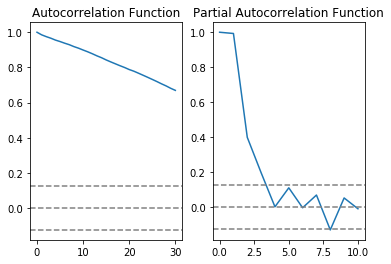

In [36]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(ts_train, nlags=30)
lag_pacf=pacf(ts_train, nlags=10, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')


4 Lags gives the least correlation.

In [ ]:
starttime=ts.index[ts.index.get_loc('2010-1-30', method='nearest')]
endtime= ts.index[-1]
       

In [38]:
from pmdarima.arima import auto_arima
paramsearch=auto_arima(ts_train,start_p=2,d=None,start_q=1,max_p=7,max_d=1,max_q=5,start_P=1
                  ,D=1,start_Q=1,max_P=7,max_D=3,max_Q=7,m=12, trace=True,enforce_stationarity=False)

Performing stepwise search to minimize aic


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4820.433, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4716.587, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4666.609, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4758.847, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4668.068, Time=0.44 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4668.048, Time=0.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4703.919, Time=0.18 sec


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.91 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.73 sec


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.55 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 17.836 seconds


In [ ]:
#ARIMA
y_hat_avg = ts_test.copy()
fit1 = sm.tsa.statespace.SARIMAX(ts_train, order=(2, 1, 1),freq='m',seasonal_order=(0,0,0,0),enforce_stationarity=False, enforce_invertibility=False).fit()
y_hat_avg['ARIMA'] = fit1.predict(start=ts_test.index[0],end='2020-1-30')
plt.figure(figsize=(16,8))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

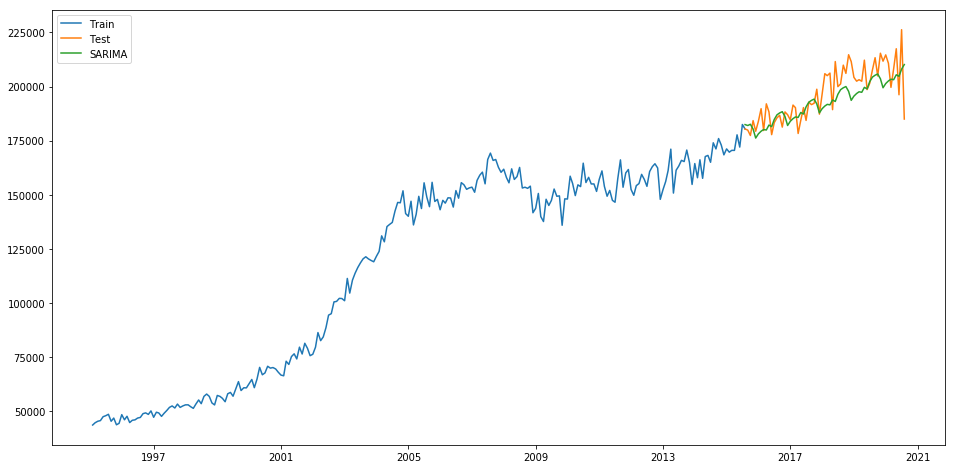

In [49]:
import statsmodels.api as sm
from datetime import datetime
#SARIMA
y_hat_avg = ts_test.copy()
fit2 = sm.tsa.statespace.SARIMAX(ts_train, order=(0, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit2.predict(start=ts_test.index[0],end=ts_test.index[-1])
plt.figure(figsize=(16,8))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [47]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  247
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2330.305
Date:                            Sun, 04 Oct 2020   AIC                           4666.609
Time:                                    23:33:20   BIC                           4676.975
Sample:                                01-31-1995   HQIC                          4670.789
                                     - 07-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4219      0.067     -6.282      0.000      -0.554      -0.290
ma.S.L12      -0.8411      0.078    -10.769      0.000      -0.994      -0.688
sigma2      3.644e+07   3.27e-10   1.11e+17      0.000    3.64e+07    3.64e+07
===================================================================================
Ljung-Box (Q):                       43.26   Jarque-Bera (JB):                 9.47
Prob(Q):                              0.33   Prob(JB):                         0.01
Heteroskedasticity (H):               2.86   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [50]:
mse = ((ts_test - y_hat_avg['SARIMA']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
rmse=np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 76299851.95
The Root Mean Squared Error of our forecasts is 8734.98


In [51]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(ts_test, y_hat_avg.SARIMA))
print(rms)

8734.97864642623
